### FE670 - Assignment #3

**Author**: Sid Bhatia

**Date**: November 9th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Problem #1

Shrinkage estimator is a form of averaging different estimators. The shrinkage estimator typically consists of three components: (1) an estimator with little or no structure (like the sample mean above); (2) an estimator with a lot of structure (the shrinkage target); and (3) the shrinkage intensity.

$$\hat{\mu}_{JS} = (1 - w)\hat{\mu} + w\mu_0\mathbf{I}$$

The most well-known shrinkage estimator used to estimate expected returns in the financial literature is the one proposed by Jorion and Stein (1), where the shrinkage target $\mu_0\mathbf{I}$ is given by $\mu_g\mathbf{l}$ with:

$$\mu_g = \frac{\mathbf{I}^{'} \Sigma^{-1} \hat{\boldsymbol{\mu}}}{\mathbf{I}^{'}\boldsymbol{\Sigma^{-1}}\mathbf{I}}$$

and:

$$w = \frac{N + 2}{N + 2 + T(\hat{\boldsymbol{\mu}} - \mu_g\mathbf{I})^{'}\bm{\Sigma}^{-1}(\hat{\boldsymbol{\mu}} - \mu_g\mathbf{I})}$$

The shrinkage estimator for the covariance matrix takes the form:

$$\hat{\Sigma}_{LW} = w\hat{\Sigma}_{CC} + (1 - w)\hat{\Sigma}$$

where $\hat{\Sigma}$ is the sample covariance matrix, and $\hat{\Sigma}_{CC}$ is the sample covariance matrix with constant correlation.

First, we decompose the sample covariance matrix according to $\hat{\Sigma} = \Lambda C \Lambda^{'}$, where $\Lambda$ is a diagonal matrix of the standard
deviation of returns and $C$ is the sample correlation matrix. The correlation matrix $C$ can be written as:

$$C = \begin{bmatrix}
1 & \hat{\rho}_{12} & \cdots & \hat{\rho}_{1N} \\
\hat{\rho}_{12} & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \hat{\rho}_{N-1N} \\
\hat{\rho}_{N1} & \cdots & \hat{\rho}_{NN-1} & 1
\end{bmatrix}$$

We then replace the sample correlation matrix with the constant correlation matrix:

$$C_{CC} = \begin{bmatrix}
1 & \hat{\rho} & \cdots & \hat{\rho} \\
\hat{\rho} & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \hat{\rho} \\
\hat{\rho} & \cdots & \hat{\rho} & 1
\end{bmatrix}$$

where $\hat{\rho}$ is the average of all the sample correlations, in other words:

$$\hat{\rho} = \frac{2}{(N-1)N}\sum_{i=1}^{N}\sum_{j = i + 1}^{N}\hat{\rho}_{ij}$$

Finally, we have the sample covariance matrix with the constant correlation matrix as $\hat{\Sigma}_{CC} = \Lambda C_{CC} \Lambda^{'}$, where $\Lambda$ is a diagonal matrix of the standard deviation of returns and $C$ is the sample correlation matrix.

We use the classical mean-variance optimization as the *risk minimization* formulation, and this problem is a quadratic optimization problem with equality constraints with the solution given by:

$$w = \boldsymbol{\lambda} \boldsymbol{\hat{\Sigma}^{-1}\mathbf{I}} + \boldsymbol{\gamma\hat{\Sigma}^{-1}\mu} \\
\text{where} \\
\boldsymbol{\lambda} = \frac{C -\mu_0B}{\Delta}, \boldsymbol{\gamma} = \frac{\mu_0A - B}{\Delta} \\
A=\mathbf{l}^{\prime} \hat{\boldsymbol{\Sigma}}^{-1} \mathbf{l}, B=\mathbf{l}^{\prime} \hat{\boldsymbol{\Sigma}}^{-1} \hat{\boldsymbol{\mu}}, C=\hat{\boldsymbol{\mu}}^{\prime} \hat{\boldsymbol{\Sigma}}^{-1} \hat{\boldsymbol{\mu}} \\
\Delta = \mathbf{AC} - \mathbf{B}^2
$$

It is easy to see that:

$$\begin{equation}
\begin{array}{r}
\sigma_0^2=\mathbf{w}^{\prime} \hat{\boldsymbol{\Sigma}} \mathbf{w} \\
=\frac{\boldsymbol{A} \mu_0^2-2 \boldsymbol{B} \mu_0+\boldsymbol{C}}{\boldsymbol{\Delta}}
\end{array}
\end{equation}$$

Now, if we take $n = 2, T = 10,000$ and denote denote the optimal solution by $w(\sigma_0^2)$, and assume that the sample estimator $\boldsymbol{\hat{\mu}} = \left(\begin{array}{cc} 0.05 \\ 0.10 \end{array}\right)$ and $\hat{\Sigma}=\left(\begin{array}{cc} 0.01 & -0.01 \\ -0.01 & 0.04 \end{array}\right)$, please answer the following questions:

1. Please use sample estimator $\hat{\mu}$ and $\hat{\Sigma}$ to plot the efficient frontier of the portfolio, and calculate the variance when $\boldsymbol{\mu_0} = 0.10$ manually (please do not use the simulation method).

To solve the mean-variance optimization problem, we can formulate it as follows:

$$\begin{aligned}
& \min _w w^{\prime} \hat{\Sigma} w \\
& \text { s.t. } \quad w^{\prime} \hat{\mu}=\mu_p \\
& w^{\prime} \mathbf{I}=1
\end{aligned}$$

where:
- $w$ is the vector of portfolio weights.
- $w^{\prime}$ denotes the transpose of vector $w$.
- $\mathbf{I} is the identity vector (with all elements equal to 1).

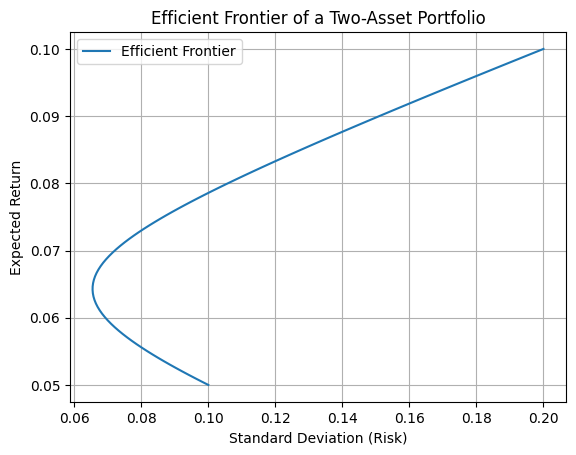

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample expected returns
mu = np.array([0.05, 0.10])

# Sample covariance matrix
Sigma = np.array([[0.01, -0.01],
                  [-0.01, 0.04]])

# Calculate the inverse of the covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Number of points on the efficient frontier
n_points = 100

m

# The minimum and maximum expected return
min_return = min(mu)
max_return = max(mu)

# Set up an array to hold the expected return values
expected_returns = np.linspace(min_return, max_return, n_points)

# Initialize lists to hold the standard deviations and weights
standard_deviations = []
frontier_weights = []

# Calculate the efficient frontier
for expected_return in expected_returns:
    # The weights for the minimum variance given the expected return
    A = np.ones_like(mu).T @ Sigma_inv @ np.ones_like(mu)
    B = mu.T @ Sigma_inv @ np.ones_like(mu)
    C = mu.T @ Sigma_inv @ mu
    D = A * C - B ** 2

    g = (C - B * expected_return) / D
    h = (A * expected_return - B) / D

    weights = Sigma_inv @ (g * np.ones_like(mu) + h * mu)
    frontier_weights.append(weights)

    # The standard deviation (risk) of the portfolio
    variance = weights.T @ Sigma @ weights
    sd = np.sqrt(variance)
    standard_deviations.append(sd)

# Convert lists to arrays
standard_deviations = np.array(standard_deviations)
frontier_weights = np.array(frontier_weights)

# Plot the efficient frontier
plt.plot(standard_deviations, expected_returns, label='Efficient Frontier')
plt.title('Efficient Frontier of a Two-Asset Portfolio')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

mu_0 = 0.10

2. Please use shrinkage target and intensity in equations (2) and (3) to calculate the shrinkage estimator $\hat{\mu}_{JS}$ and $\hat{\Sigma}_{LW}$ to build a new efficient frontier and overlay it with the efficient frontier from the previous question, and calculate variance $\boldsymbol{\mu_0} = 0.10$ manually.

3.  Please make comments on the differences of the two different estimation approaches in portfolio decisions.